# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create URL to get the weather info from the Weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Create empty lists for API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the counter 
record = 1

# Log file print statement
print(f"Retreiving Weather data for below cities")
print(f"----------------------------------------")

#Loop through the cities
for city in cities:  
    
    # Try statement to append calls where value is found 
    # If no city is found due to KeyError: skip and print "city not found"
    try: 
        response = requests.get(query_url +city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
               
        # Add one to record counter 
        record = record + 1
        
        # Wait a second in loop
        time.sleep(1.01)
        
    # If no record found "skip" 
    except KeyError:
        print("City not found. Skipping...")
    continue

Retreiving Weather data for below cities
----------------------------------------
Processing Record 1 | Port Keats
Processing Record 2 | Poum
Processing Record 3 | Hilo
Processing Record 4 | Khandyga
Processing Record 5 | Port Alfred
Processing Record 6 | Rikitea
Processing Record 7 | Olafsvik
Processing Record 8 | Idenao
Processing Record 9 | Zhigansk
Processing Record 10 | Kungurtug
Processing Record 11 | Lüderitz
Processing Record 12 | Iqaluit
Processing Record 13 | Pandan
Processing Record 14 | Khrebtovaya
Processing Record 15 | Mil'kovo
Processing Record 16 | Bedi
Processing Record 17 | Hithadhoo
Processing Record 18 | Saint George
Processing Record 19 | Sorsk
Processing Record 20 | Atuona
Processing Record 21 | Hermanus
Processing Record 22 | Campbell River
Processing Record 23 | Lavrentiya
Processing Record 24 | Lagoa
Processing Record 25 | Lompoc
City not found. Skipping...
Processing Record 26 | Yutsa
Processing Record 27 | Båtsfjord
Processing Record 28 | Bosaso
Processing Re

Processing Record 227 | Saint Stephen
Processing Record 228 | Thunder Bay
Processing Record 229 | Amga
Processing Record 230 | Siocon
Processing Record 231 | Mīnāb
City not found. Skipping...
Processing Record 232 | Ahome
Processing Record 233 | Ancud
Processing Record 234 | Khorinsk
Processing Record 235 | Zapolyarnyy
Processing Record 236 | Kota Kinabalu
Processing Record 237 | Dingcheng
City not found. Skipping...
Processing Record 238 | Egvekinot
Processing Record 239 | Cayenne
Processing Record 240 | Manaure
Processing Record 241 | Paramonga
Processing Record 242 | Tilichiki
Processing Record 243 | Westport
Processing Record 244 | Nueva Loja
Processing Record 245 | Zhezkazgan
Processing Record 246 | Mafinga
Processing Record 247 | Harper
Processing Record 248 | Marsabit
Processing Record 249 | Erenhot
City not found. Skipping...
Processing Record 250 | Kaberamaido
Processing Record 251 | Gympie
Processing Record 252 | Krasnyy Chikoy
Processing Record 253 | Pochutla
Processing Reco

City not found. Skipping...
Processing Record 453 | Paoua
Processing Record 454 | Portland
Processing Record 455 | Labuhan
Processing Record 456 | Gao
Processing Record 457 | Kalmunai
Processing Record 458 | Belaya Gora
Processing Record 459 | Barguzin
Processing Record 460 | Anapskaya
City not found. Skipping...
Processing Record 461 | Belyy Yar
Processing Record 462 | Sept-Îles
Processing Record 463 | Chitral
Processing Record 464 | Inhambane
Processing Record 465 | Klaksvík
Processing Record 466 | Walvis Bay
Processing Record 467 | Ürümqi
Processing Record 468 | Moindou
Processing Record 469 | Fayaoué
Processing Record 470 | Laguna
Processing Record 471 | Rawson
Processing Record 472 | Malakal
Processing Record 473 | Zyryanka
Processing Record 474 | Tiznit Province
Processing Record 475 | Rørvik
Processing Record 476 | Louis Trichardt
Processing Record 477 | Henties Bay
Processing Record 478 | Mīzan Teferī
Processing Record 479 | Lebu
Processing Record 480 | Nanyang
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness, 
    "Country": country,
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create a data frame the weather dictionary
weather_df = pd.DataFrame(weather_dict)

#Make weather df into csv file
weather_df.to_csv("output_data/cities.csv")

#Display the weather_df data
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Keats,0,AU,1620955205,26,-14.2500,129.5500,81.99,13.18
1,Poum,23,NC,1620955206,74,-20.2333,164.0167,77.38,16.04
2,Hilo,90,US,1620955056,65,19.7297,-155.0900,78.80,9.22
3,Khandyga,100,RU,1620955208,31,62.6667,135.6000,48.79,5.48
4,Port Alfred,0,ZA,1620955210,82,-33.5906,26.8910,59.74,3.78


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

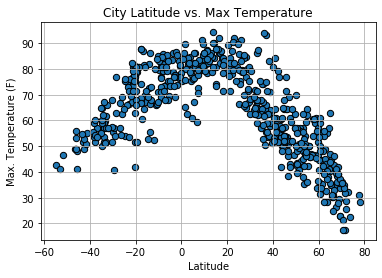

In [23]:
# Make a scatter plot to show Latitude Vs. Temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=40, edgecolors='black')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_MaxTemp.png")

# Show plot
plt.show()

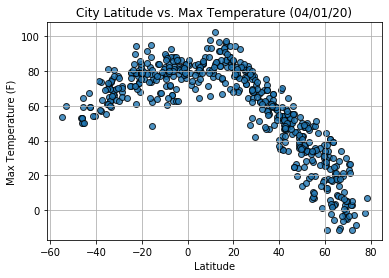

## Latitude vs. Humidity Plot

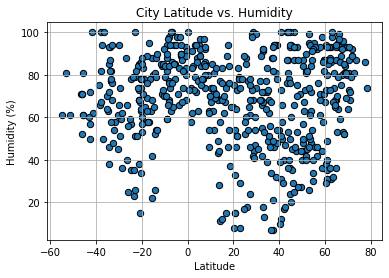

In [22]:
# Make a scatter plot to show Latitude Vs. Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=40, edgecolors='black')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

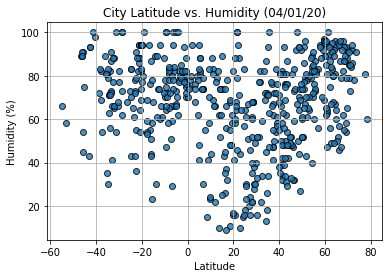

## Latitude vs. Cloudiness Plot

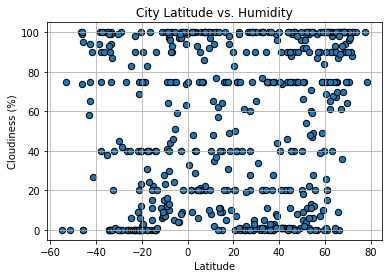

In [24]:
# Make a scatter plot to show Latitude Vs. Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=40, edgecolors='black')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Humidity")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

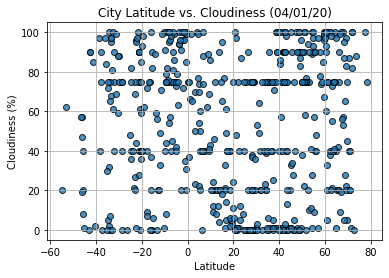

## Latitude vs. Wind Speed Plot

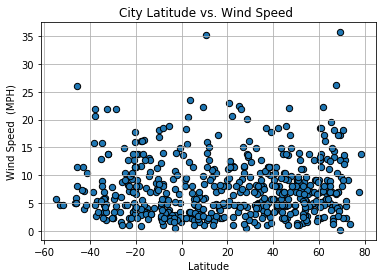

In [25]:
# Make a scatter plot to show Latitude Vs. Wind Speed 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=40, edgecolors='black')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Wind Speed ")
plt.ylabel("Wind Speed  (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind Speed .png")

# Show plot
plt.show()

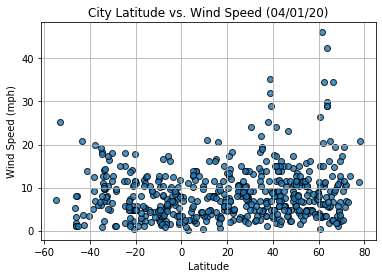

## Linear Regression

In [26]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Keats,0,AU,1620955205,26,-14.2500,129.5500,81.99,13.18
1,Poum,23,NC,1620955206,74,-20.2333,164.0167,77.38,16.04
2,Hilo,90,US,1620955056,65,19.7297,-155.0900,78.80,9.22
3,Khandyga,100,RU,1620955208,31,62.6667,135.6000,48.79,5.48
4,Port Alfred,0,ZA,1620955210,82,-33.5906,26.8910,59.74,3.78
...,...,...,...,...,...,...,...,...,...
549,Sairang,40,IN,1620955879,78,23.8000,92.6667,75.20,8.05
550,Tezu,100,IN,1620955613,98,27.9167,96.1667,66.25,2.64
551,Quesnel,90,CA,1620955882,51,52.9999,-122.5029,62.60,8.05
552,Umm Kaddadah,11,SD,1620955655,44,13.6017,26.6876,80.69,4.63


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
NorthernHem = weather_df[weather_df['Lat']>0]
SouthernHem = weather_df[weather_df['Lat']<0]

The r-value is: -0.8705660702251504


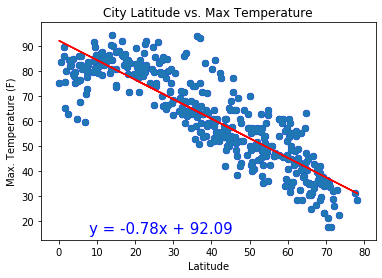

In [82]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(NorthernHem["Lat"], NorthernHem["Max Temp"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = NorthernHem['Lat']
y_axis = NorthernHem['Max Temp']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(8,15),fontsize=15,color="blue")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("MaxTemp vs. Latitude regress.png")

# Show plot
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7640419731954887


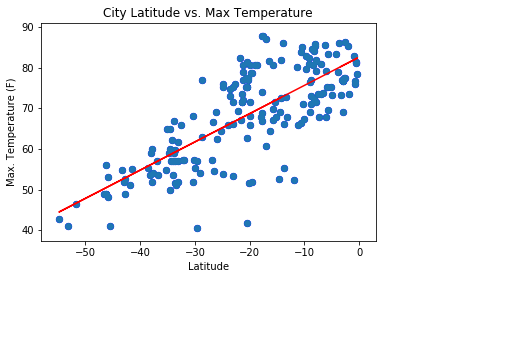

In [81]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(SouthernHem["Lat"], SouthernHem["Max Temp"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = SouthernHem['Lat']
y_axis = SouthernHem['Max Temp']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(8,15),fontsize=15,color="blue")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("MaxTemp vs Latitude regress.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.055950605342338484


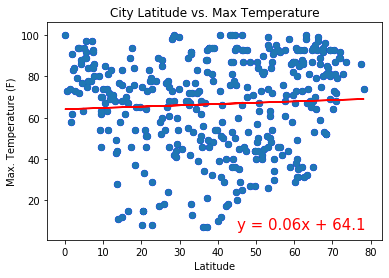

In [80]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(NorthernHem["Lat"], NorthernHem["Humidity"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = NorthernHem['Lat']
y_axis = NorthernHem['Humidity']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,6),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Humidity vs. Latitude regress.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2662515958469407


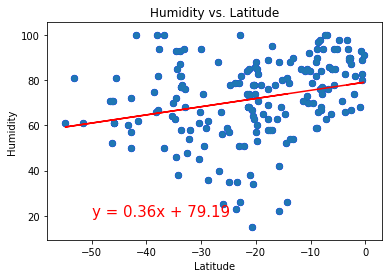

In [79]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(SouthernHem["Lat"], SouthernHem["Humidity"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = SouthernHem['Lat']
y_axis = SouthernHem['Humidity']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Humidity vs. Latitude regress.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2033709666507453


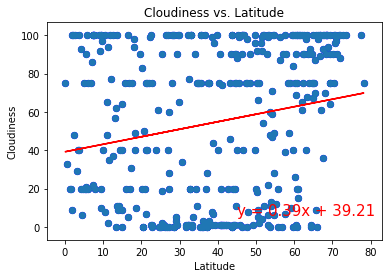

In [78]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(NorthernHem["Lat"], NorthernHem["Cloudiness"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = NorthernHem['Lat']
y_axis = NorthernHem['Cloudiness']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,6),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Cloudiness vs. Latitude regress.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.024299025493997557


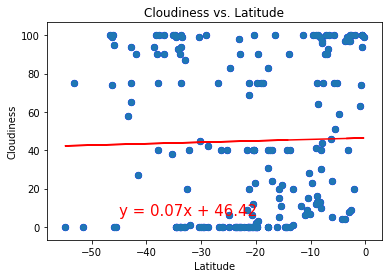

In [77]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(SouthernHem["Lat"], SouthernHem["Cloudiness"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = SouthernHem['Lat']
y_axis = SouthernHem['Cloudiness']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-45,6),fontsize=15,color="red")

# Save the figure
plt.savefig("Cloudiness vs. Latitude regress.png")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04655698897238708


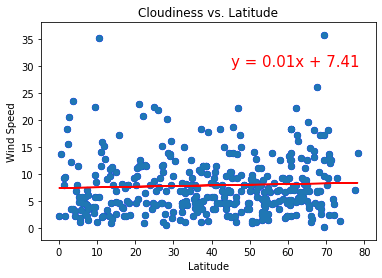

In [85]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(NorthernHem["Lat"], NorthernHem["Wind Speed"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = NorthernHem['Lat']
y_axis = NorthernHem['Wind Speed']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Wind Speed vs. Latitude regress.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11133474285605259


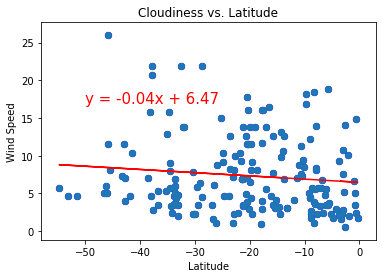

In [91]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(SouthernHem["Lat"], SouthernHem["Wind Speed"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = SouthernHem['Lat']
y_axis = SouthernHem['Wind Speed']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Wind Speed vs. Latitude regress.png")

# Show plot
plt.show()